In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df['Close'] = df['Close'].apply(lambda x: float(x.replace(',', '')))

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.250000,332.830000,324.970000,663.590000,"7,380,500"
1,01/04/2012,331.270000,333.870000,329.080000,666.450000,"5,749,400"
2,01/05/2012,329.830000,330.750000,326.890000,657.210000,"6,590,300"
3,01/06/2012,328.340000,328.770000,323.680000,648.240000,"5,405,900"
4,01/09/2012,322.040000,322.290000,309.460000,620.760000,"11,688,800"
...,...,...,...,...,...,...
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.739990,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100


In [6]:
training_set = df.iloc[:, 4:5].values
training_set

array([[ 663.59    ],
       [ 666.45    ],
       [ 657.21    ],
       ...,
       [1049.369995],
       [1048.140015],
       [1046.400024]])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60, len(scaled_training_set)):
    X_train.append(scaled_training_set[i-60: i, 0])
    y_train.append(scaled_training_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [11]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-07-20 22:03:08.362180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-20 22:03:08.363087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100


2023-07-20 22:03:42.540691: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-20 22:03:43.997612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:03:44.509107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:03:44.694672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:03:44.849110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:03:45.010284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:03:45.248337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

46/46 [==============================] - 8s 91ms/step - loss: 0.0292
Epoch 2/100
46/46 [==============================] - 3s 68ms/step - loss: 0.0079
Epoch 3/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0079
Epoch 4/100
46/46 [==============================] - 3s 65ms/step - loss: 0.0055
Epoch 5/100
46/46 [==============================] - 3s 64ms/step - loss: 0.0051
Epoch 6/100
46/46 [==============================] - 3s 64ms/step - loss: 0.0046
Epoch 7/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0040
Epoch 8/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0039
Epoch 9/100
46/46 [==============================] - 3s 68ms/step - loss: 0.0035
Epoch 10/100
46/46 [==============================] - 3s 66ms/step - loss: 0.0034
Epoch 11/100
46/46 [==============================] - 3s 67ms/step - loss: 0.0037
Epoch 12/100
46/46 [==============================] - 3s 68ms/step - loss: 0.0046
Epoch 13/100
46/46 [=================

In [23]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600
...,...,...,...,...,...,...
120,25/06/2018,1143.599976,1143.910034,1112.780029,1124.810059,2157300
121,26/06/2018,1128.000000,1133.209961,1116.659058,1118.459961,1563200
122,27/06/2018,1121.339966,1131.836060,1103.619995,1103.979980,1293900
123,28/06/2018,1102.089966,1122.310059,1096.010010,1114.219971,1072400


In [15]:
real_stock_price = dataset_test.iloc[:, 4: 5].values

In [16]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), 
                          axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

/var/folders/58/fz8921qx2fngl6byrhmxmd880000gn/T/ipykernel_10384/320217154.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [17]:
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [18]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
predicted_stock_price = regressor.predict(X_test)

2023-07-20 22:10:25.391209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:10:25.569158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:10:25.698869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-20 22:10:25.829239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/4 [======>.......................] - ETA: 3s

2023-07-20 22:10:25.961387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 148ms/step


In [21]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

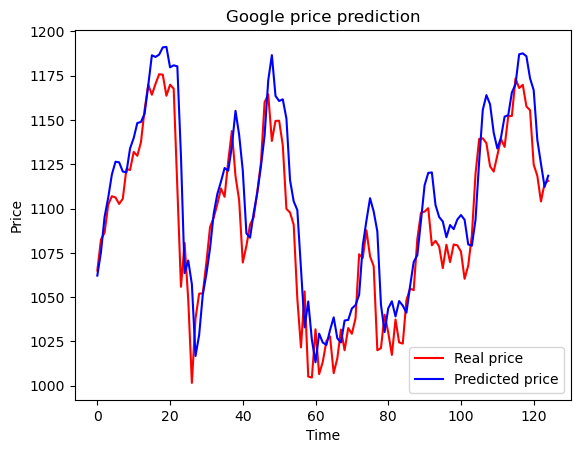

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()